In [38]:
import numpy as np 
import pandas as pd 

import os 

work_dir = os.path.dirname(os.getcwd())
df_dir = os.path.join(work_dir, 'df')
output_dir = os.path.join(work_dir, 'output')

In [39]:
df = pd.read_csv(os.path.join(output_dir, 'electoral_rolls_output.csv'), header='infer', sep=';', encoding='utf-8')

In [40]:
print(df.head(10))
print("shape",df.shape)

    id    voter_id                     name house_number  age  gender  \
0   20  TNH3552262    Jtender Kumar Singh K           46   66    MALE   
1    8  TNH3421906              Aslam Uddin           18   28    MALE   
2   28  TNH3421898    Romij Uddin Choudhary           18   32    MALE   
3   77  TNH2625077                   Suma B          17/   34  FEMALE   
4   26  TNH2625085               Sharadamma           17   55  FEMALE   
5   25  TNH3874401                      NaN          NaN   41  FEMALE   
6    4  TNH3518768             Huda Fathima         14/3   25  FEMALE   
7   23  TNH3508488   Mohammed Mahabubunnisa         14/2   43  FEMALE   
8    2  TNH3508496        Shaik Abdul Basha         14/2   46    MALE   
9  470  TNH3508470  Mohammed Ashraf Unnisa_         14/2   61  FEMALE   

  parent_or_spouse_name_only  
0             Rajkumar Singh  
1               Bodrul Hoque  
2         Junab Ali Choudary  
3       Late Vishnu Bahaddur  
4                Late Vishnu  
5         

In [5]:
# Actual number of voters present in the pdf as mentioned in the pdf : 779 , 396 male and 383 female voters. 

In [41]:
# Analysis 1: df completeness (missing or null values)
missing_data = df.isnull().sum()

# Analysis 2: Basic statistical analysis for numerical fields like age
age_statistics = df['age'].describe()
print("missing df>>>")
print(missing_data)
print("\nage statistics")
print(age_statistics)
print('\ngender statistics')
# group by gender and show count
gender_statistics = df.groupby(['gender'])['id'].count()
# gender_statistics = df['gender'].describe()
print(gender_statistics)


missing df>>>
id                             0
voter_id                      31
name                          33
house_number                  53
age                            0
gender                         0
parent_or_spouse_name_only    11
dtype: int64

age statistics
count    780.000000
mean      49.787179
std       17.523748
min       18.000000
25%       36.000000
50%       47.000000
75%       62.000000
max      103.000000
Name: age, dtype: float64

gender statistics
gender
FEMALE    383
MALE      397
Name: id, dtype: int64


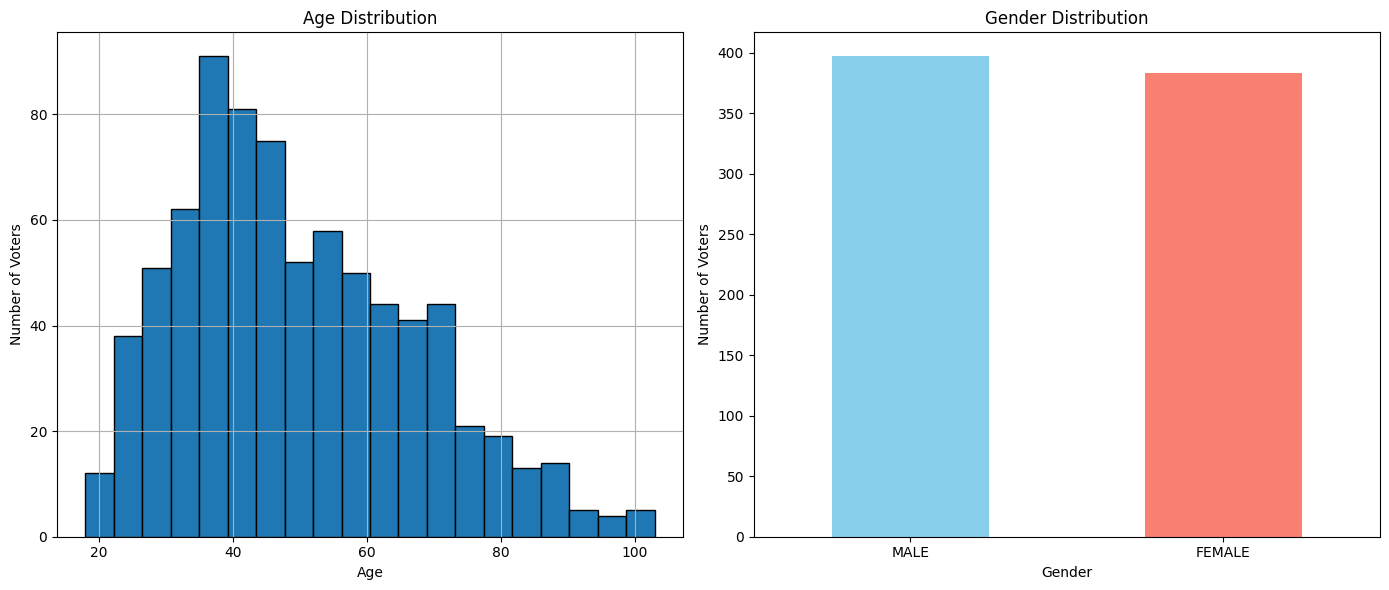

In [42]:
import matplotlib.pyplot as plt

# Analysis 3: Demographic analysis (Age and Gender distribution)
# Age distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('Age Distribution')
df['age'].hist(bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Voters')

# Gender distribution
plt.subplot(1, 2, 2)
plt.title('Gender Distribution')
df['gender'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Number of Voters')
plt.xticks(rotation=0)  # keep the x-axis labels horizontal for better readability

plt.tight_layout()
plt.show()



In [43]:
# Analysis 4: Check for duplicate records in 'voter_id'
duplicate_voter_ids = df['voter_id'].duplicated().sum()
print("duplicate voter ids",duplicate_voter_ids)

duplicate_ids = df['id'].duplicated().sum()
print("duplicate ids",duplicate_ids) 



duplicate voter ids 32
duplicate ids 301


Out of total 779 voters, we have parsed 780 voters, showing 1 duplicate records. 

Gender classification is accurate as mentioned in the document there are 383 females and 396 males. 

While parsing ids due to irregular regex pattern, there are duplicates. Ids are not being parsed properly.